# Random Walk
- Start in the center state, C.
- Move left or right 
- Move one state on each step
- States: T <-> A <-> B <-> C <-> D <-> E <-> T
- Actions: Left or Right
- Next State = State + Action

In [97]:
import random
import matplotlib.pyplot as plt

In [98]:
# The true value of states A - E
true_values = [0/6, 1/6, 2/6, 3/6, 4/6, 5/6, 0/6]

# Number of episodes
episodes = 100

# TERMINAL
terminal = [0, 6]


In [99]:
def td_zero(episodes, terminal):
    """
    Return TD(0)
    """
    
    #####################################
    # Tabular TD(0) for estimating v-pi #
    #####################################

    # Input: the policy pi to be evaluated (arbitrary)
    policy = (-1, 1)

    # Algorithm parameter: step size a -> (0, 1]
    alpha = 0.1
    
    # Initialize V(s), for all s of S+ (arbitrarily) and V(terminal) = 0
    V = [0] * 7

    # Loop for each episode:
    for _ in range(episodes):

        # Initialize S
        S = 3

        # Loop for each step of episode: until S is terminal
        while S not in terminal:

            # A <- action given by pi for S
            A = random.choice(policy)

            # reset reward
            R = 0

            # Take action A, observe R, S'
            if S+A == terminal[1]: R = 1

            # V(S) <-- V(S) + alpha*[R + V(S') - V(S)]
            V[S] = V[S] + alpha*((R + V[S+A]) - V[S])

            # S <-- S'
            S += A

    # v_pi
    return V

In [100]:
def td_batch(episodes, terminal):
    """
    Optimality of TD(0)
    """
    
    # Batch list
    batch = []
    
    #####################################
    # Tabular TD(0) for estimating v-pi #
    #####################################

    # Input: the policy pi to be evaluated (arbitrary and sub-optimal)
    policy = (-1, 1)

    # Algorithm parameter: step size a -> (0, 1]
    alpha = 0.1
    
    # Approximate value function, V
    V = td_zero(episodes, terminal)

    # Loop for each episode:
    for _ in range(episodes):

        # Initialize S
        S = 3

        # Loop for each step of episode: until S is terminal
        while S not in terminal:

            # A <- action given by pi for S
            A = random.choice(policy)

            # reset reward
            R = 0

            # Take action A, observe R, S'
            if S+A == terminal[1]: R = 1

            # V(S) <-- V(S) + alpha*[R + V(S') - V(S)]
            V[S] = V[S] + alpha*((R + V[S+A]) - V[S])
            
            # Add step of each episode to batch
            batch.append((S, A, R))
            
            # S <-- S'
            S += A
            
        ################
        # Batch update #
        ################
        for S, A, R in batch:
            
            # V(S) <-- V(S) + alpha*[R + V(S') - V(S)]
            V[S] = V[S] + alpha*((R + V[S+A]) - V[S])

    # Output v_pi
    return V

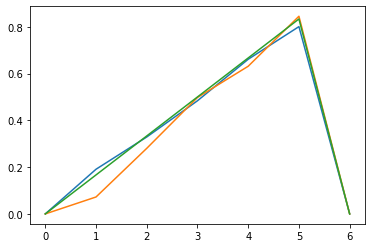

In [101]:
plt.plot(td_zero(episodes, terminal))
plt.plot(td_batch(episodes, terminal))
plt.plot(true_values)
plt.show()